# <span style = "color:DarkMagenta;font-size:40px"> Fashion MNIST </span>

***

## About the dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

## Content

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

<b>Labels</b>
 * 0 - T-shirt/top
 * 1 - Trouser
 * 2 - Pullover
 * 3 - Dress
 * 4 - Coat
 * 5 - Sandal
 * 6 - Shirt
 * 7 - Sneaker
 * 8 - Bag
 * 9 - Ankle Boot

## Let's Get Started

### Import all necessary libraries

In [4]:
!pip install tensorflow

     -------------------------------------- 272.8/272.8 MB 8.3 MB/s eta 0:00:00
     --------------------------------------- 24.4/24.4 MB 21.8 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 19.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ------------------------------------- 440.7/440.7 kB 28.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 15.9 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ------------------------------------- 420.6/420.6 kB 13.2 MB/s eta 0:00:00
     ---------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.5 which is incompatible.


In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Read 'fashion_mnist.csv' and store it in a dataframe

In [6]:
data = pd.read_csv('fashion_mnist.csv')

### View the dataset

In [7]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### View the columns in the dataset

In [8]:
data.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

### Check the shape of the dataset

In [9]:
data.shape

(60000, 785)

### Split the dataset into X and y(Input and Target Variables)

In [10]:
X = data.drop(columns = ['label'])
y = data['label']

### Check the shape of X

In [11]:
X.shape

(60000, 784)

### Check the shape of y

In [12]:
y.shape

(60000,)

### Reshape X to (len(X), 28,28,1)

In [13]:
X = X.values.reshape((len(X),28,28,1))

### Check the shape of X

In [14]:
X.shape

(60000, 28, 28, 1)

### Normalise the data

In [15]:
X = X/255

In [16]:
X

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

### Plot some of the figures

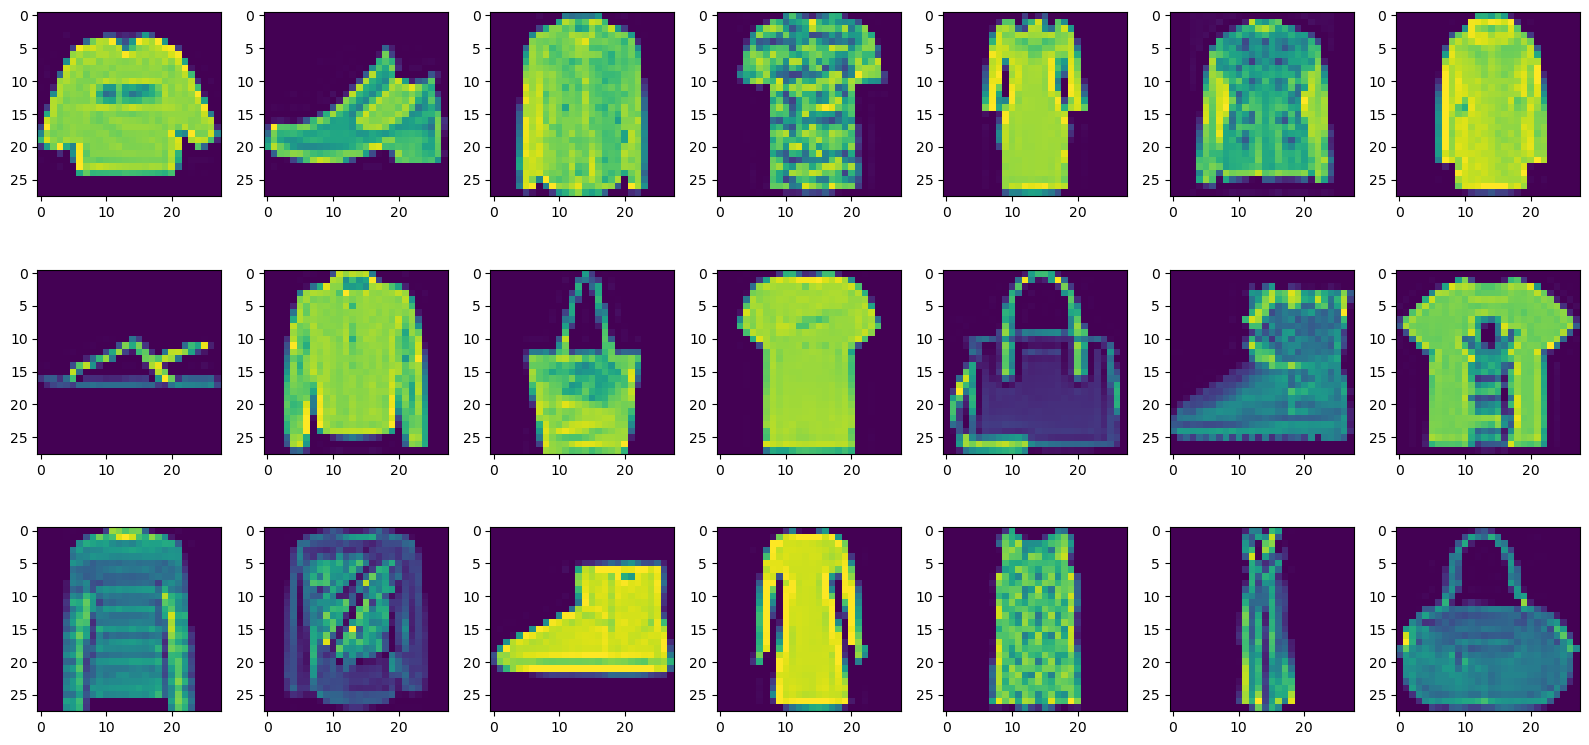

In [17]:
plt.figure(figsize = (16,8))
for i in range(21):
    plt.subplot(3,7,i+1)
    plt.imshow(X[i])
plt.tight_layout()

### Split the dataset into Training and Testing set

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

### Check the shape of X_train and X_test

In [19]:
X_train.shape

(48000, 28, 28, 1)

In [20]:
X_test.shape

(12000, 28, 28, 1)

### Create a keras Sequential model with 2 hidden layers

In [21]:
model = keras.Sequential([
                  keras.layers.Flatten(input_shape = (28,28)),
                  keras.layers.Dense(100, activation="relu"),
                  keras.layers.Dense(10,activation="sigmoid")
])

### Compile Keras Model

In [22]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

### Check summary of the model

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [24]:
model.fit(X_train,y_train, epochs = 5, validation_split=0.05, batch_size = 20)

Epoch 1/5
2280/2280 [==============================] - 5s 2ms/step - loss: 0.5253 - accuracy: 0.8131 - val_loss: 0.3996 - val_accuracy: 0.8717
Epoch 2/5
2280/2280 [==============================] - 5s 2ms/step - loss: 0.3961 - accuracy: 0.8560 - val_loss: 0.3601 - val_accuracy: 0.8771
Epoch 3/5
2280/2280 [==============================] - 5s 2ms/step - loss: 0.3520 - accuracy: 0.8702 - val_loss: 0.3492 - val_accuracy: 0.8754
Epoch 4/5
2280/2280 [==============================] - 5s 2ms/step - loss: 0.3294 - accuracy: 0.8781 - val_loss: 0.3264 - val_accuracy: 0.8917
Epoch 5/5
2280/2280 [==============================] - 5s 2ms/step - loss: 0.3091 - accuracy: 0.8859 - val_loss: 0.3374 - val_accuracy: 0.8792


Epoch 1/10
2280/2280 [==============================] - 7s 3ms/step - loss: 0.5388 - accuracy: 0.8084 - val_loss: 0.3936 - val_accuracy: 0.8575
Epoch 2/10
2280/2280 [==============================] - 9s 4ms/step - loss: 0.3888 - accuracy: 0.8584 - val_loss: 0.3803 - val_accuracy: 0.8587
Epoch 3/10
2280/2280 [==============================] - 9s 4ms/step - loss: 0.3505 - accuracy: 0.8718 - val_loss: 0.3490 - val_accuracy: 0.8704
Epoch 4/10
2280/2280 [==============================] - 10s 4ms/step - loss: 0.3238 - accuracy: 0.8789 - val_loss: 0.3289 - val_accuracy: 0.8813
Epoch 5/10
2280/2280 [==============================] - 9s 4ms/step - loss: 0.3072 - accuracy: 0.8869 - val_loss: 0.3214 - val_accuracy: 0.8838
Epoch 6/10
2280/2280 [==============================] - 9s 4ms/step - loss: 0.2908 - accuracy: 0.8925 - val_loss: 0.3475 - val_accuracy: 0.8804
Epoch 7/10
2280/2280 [==============================] - 10s 4ms/step - loss: 0.2782 - accuracy: 0.8949 - val_loss: 0.3378 - val_accurac

### Evaluate the model

In [25]:
model.evaluate(X_train, y_train)

1500/1500 [==============================] - 2s 1ms/step - loss: 0.3037 - accuracy: 0.8850


[0.30367961525917053, 0.8850416541099548]

### Make predictions

In [26]:
prediction = model.predict(X_test)

375/375 [==============================] - 1s 2ms/step


In [27]:
prediction

array([[3.5132596e-01, 1.6014248e-02, 4.8033684e-01, ..., 3.9357410e-04,
        9.9979597e-01, 5.7281513e-04],
       [9.9920571e-01, 1.3571448e-02, 2.4948694e-01, ..., 1.6608510e-07,
        1.9568000e-03, 3.1052988e-07],
       [7.1250165e-01, 2.1370513e-02, 7.2792608e-01, ..., 5.8180108e-06,
        2.2551119e-01, 5.3150762e-07],
       ...,
       [3.1161935e-03, 2.0492007e-10, 8.1506924e-04, ..., 9.2764526e-07,
        9.9997944e-01, 1.6179446e-09],
       [3.0376101e-05, 4.7318413e-06, 2.9833927e-06, ..., 2.4194857e-01,
        1.1129222e-02, 1.1364056e-02],
       [3.7189734e-01, 9.6689576e-01, 8.9603600e-05, ..., 2.0619200e-07,
        2.4667929e-04, 3.8246508e-05]], dtype=float32)

### Create a dictionary with Key from 0 to 1 and values of labels

In [29]:
dict={0: 'T-shirt/top',1: 'Trouser', 2: 'Pullover',3: 'Dress',4: 'Coat',5: 'Sandal',6: 'Shirt',7: 'Sneaker',8: 'Bag',9: 'Ankle Boot'}

In [30]:
dict

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle Boot'}

### Store all predicted values as numbers in a list

In [31]:
predicted_values = [np.argmax(i) for i in prediction]

### Plot the first few figures in X_test along with its labels from y_test

In [85]:
y_test.reset_index(drop = True, inplace = True)

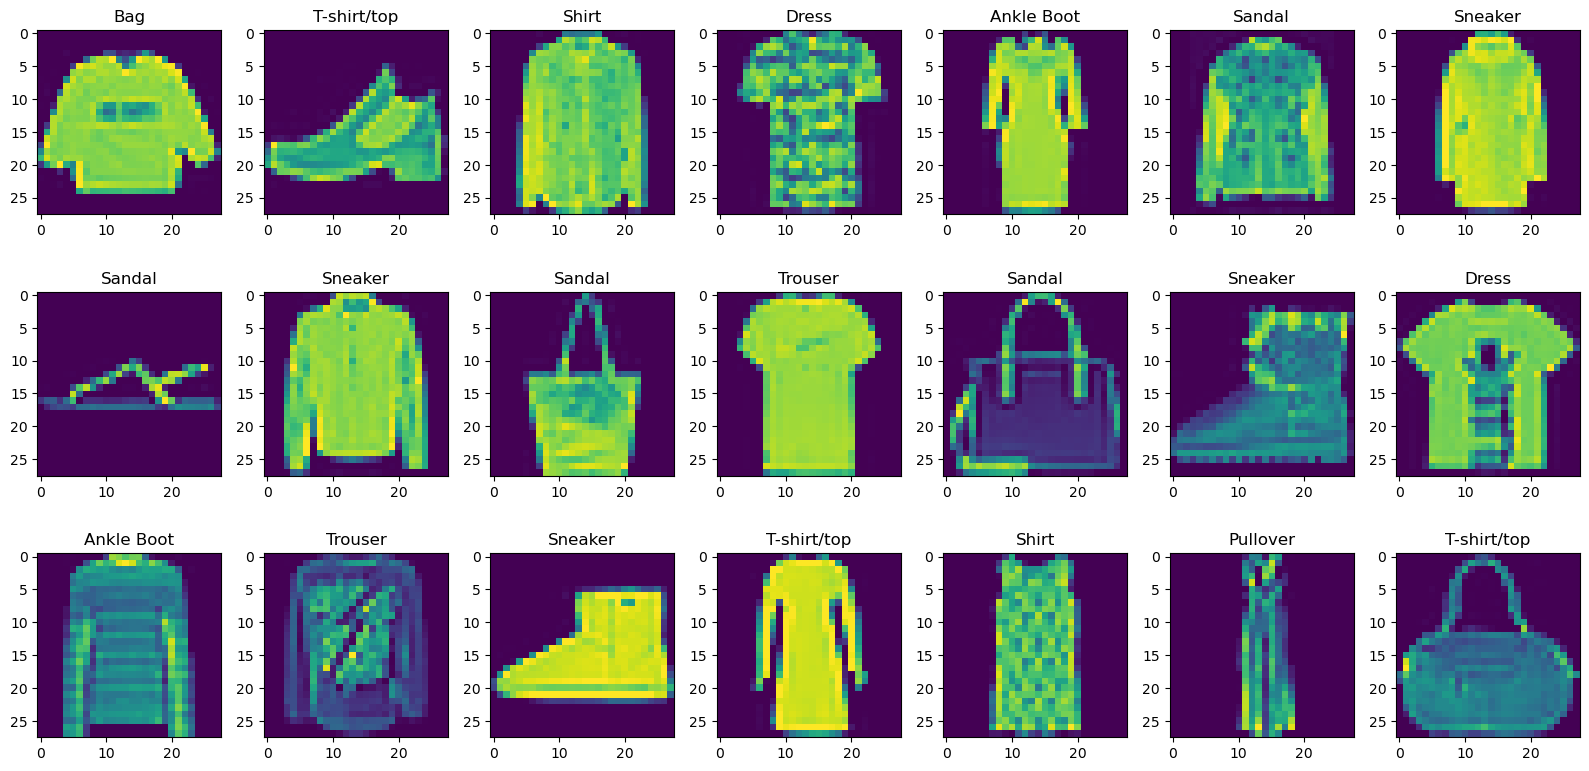

In [32]:
plt.figure(figsize = (16,8))
for i in range(21):
    plt.subplot(3,7,i+1)
    plt.imshow(X[i])
    plt.title(dict[predicted_values[i]])
plt.tight_layout()

### Now plot the figures from X-test with labels from our Predicted values

### Plot the accuracy of our prediction

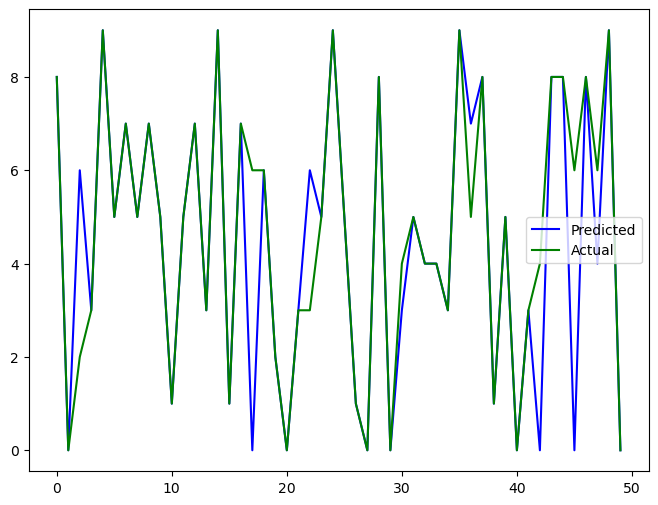

In [33]:
c = range(len(predicted_values))
plt.figure(figsize = (8,6))
plt.plot(c[:50], predicted_values[:50], color = 'blue')
plt.plot(c[:50], y_test[:50], color = 'green')
plt.legend(['Predicted', 'Actual'])
plt.show()

### Plot confusion matrix on a heatmap

Text(70.72222222222221, 0.5, 'Actual Values')

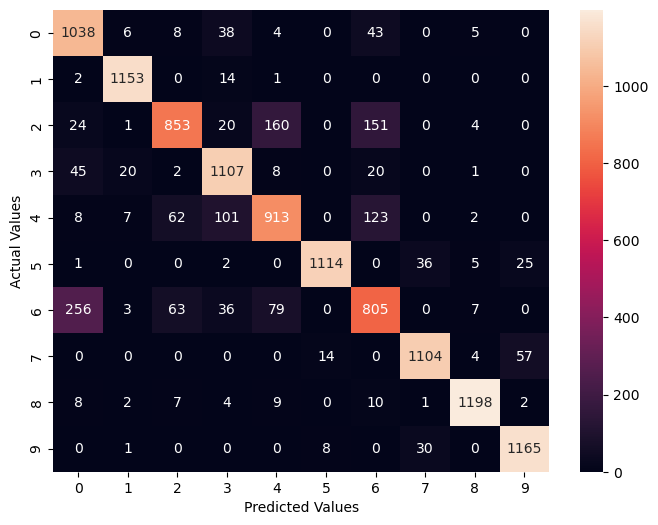

In [35]:
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test,predicted_values), annot = True, fmt = 'd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

***